# **Entendimiento del Negocio y Carga de Datos**
---

## **0. Integrantes del equipo de trabajo**
---

1. Andrés Díaz - <andiazo@unal.edu.co>
2. Leonardo Delgado - <sdelgadom@unal.edu.co>
3. Fellhipe Gutierrez - <fgutierrezf@unal.edu.co>

## **1. Marco de Proyecto**
---


### **1.1. Trasfondo del Negocio**
---

**Problema a Solucionar**: El desafío principal es la predicción precisa de qué clientes tienen más probabilidades de incumplir en sus préstamos, priorizando soluciones estables en el tiempo. La ausencia de historial crediticio complica la evaluación tradicional de riesgo, llevando a la posible exclusión de individuos beneficiarios de créditos. La estabilidad de los modelos predictivos es crucial, dado que una caída repentina en su desempeño podría resultar en la aprobación de préstamos a clientes de mayor riesgo. Por lo tanto, se busca un equilibrio entre la estabilidad y el desempeño del modelo que permita una evaluación de riesgo confiable y de larga duración.

**Dominio**: El dominio del proyecto es el sector financiero, con un enfoque específico en el crédito al consumo.

**Cliente o Beneficiarios**: Los principales beneficiarios de este proyecto son los proveedores de servicios financieros, específicamente las entidades de crédito al consumo, como Home Credit, una organización internacional enfocada en ofrecer préstamos responsables a personas con poca o ninguna historia crediticia. Estas entidades buscan expandir la inclusión financiera para la población no bancarizada, creando experiencias de préstamo positivas y seguras.


### **1.2. Alcance**
---

**Solución Deseada**: Entrenar un modelo de Machine Learning, específicamente un sistema de puntuación (scorecard), que use métodos estadísticos y de aprendizaje automático para predecir el riesgo de impago de los préstamos de manera precisa y estable. Este modelo debe ser capaz de adaptarse a cambios en el comportamiento del cliente a lo largo del tiempo sin perder precisión en sus predicciones.

### **1.3. Plan**
---


Este proyecto se desarrolla mediante la metodología CRISP-DM

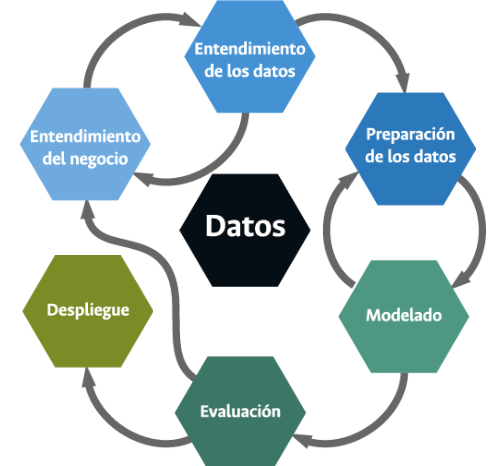

\[Imágen tomada del \[OVA\] Análisis de datos con Pandas, del curso Análisis y visualización de datos de la Universidad Nacional de Colombia \]


Para el desarrollo de este proyecto se estiman distintas actividades, las actividades generales son las siguientes:

1.	Entendimiento del negocio y carga de los datos
2.	Entendimiento de los datos
3.	Preparación de los datos
4.	Modelamiento y validación
5.	Evaluación y entrega

Dando un inicio al proyecto el día 27 de Marzo de 2024 y finalización el día 2 de Mayo de 2024, con una duración de 23 días sin contar domingos,  

Este plan está detallado en el siguiente documento: [Google Sheet](https://docs.google.com/spreadsheets/d/1gol2J-sydakxsSyAiflI76C1Bc1AUBF_U5SGc7wKINM/edit?usp=sharing)

Se adjunta una imágen del diagrama de Gantt, adicionalmente, para permitir consultar la información en detalle se recomienda revisar el enlace que se presentó anteriormente.
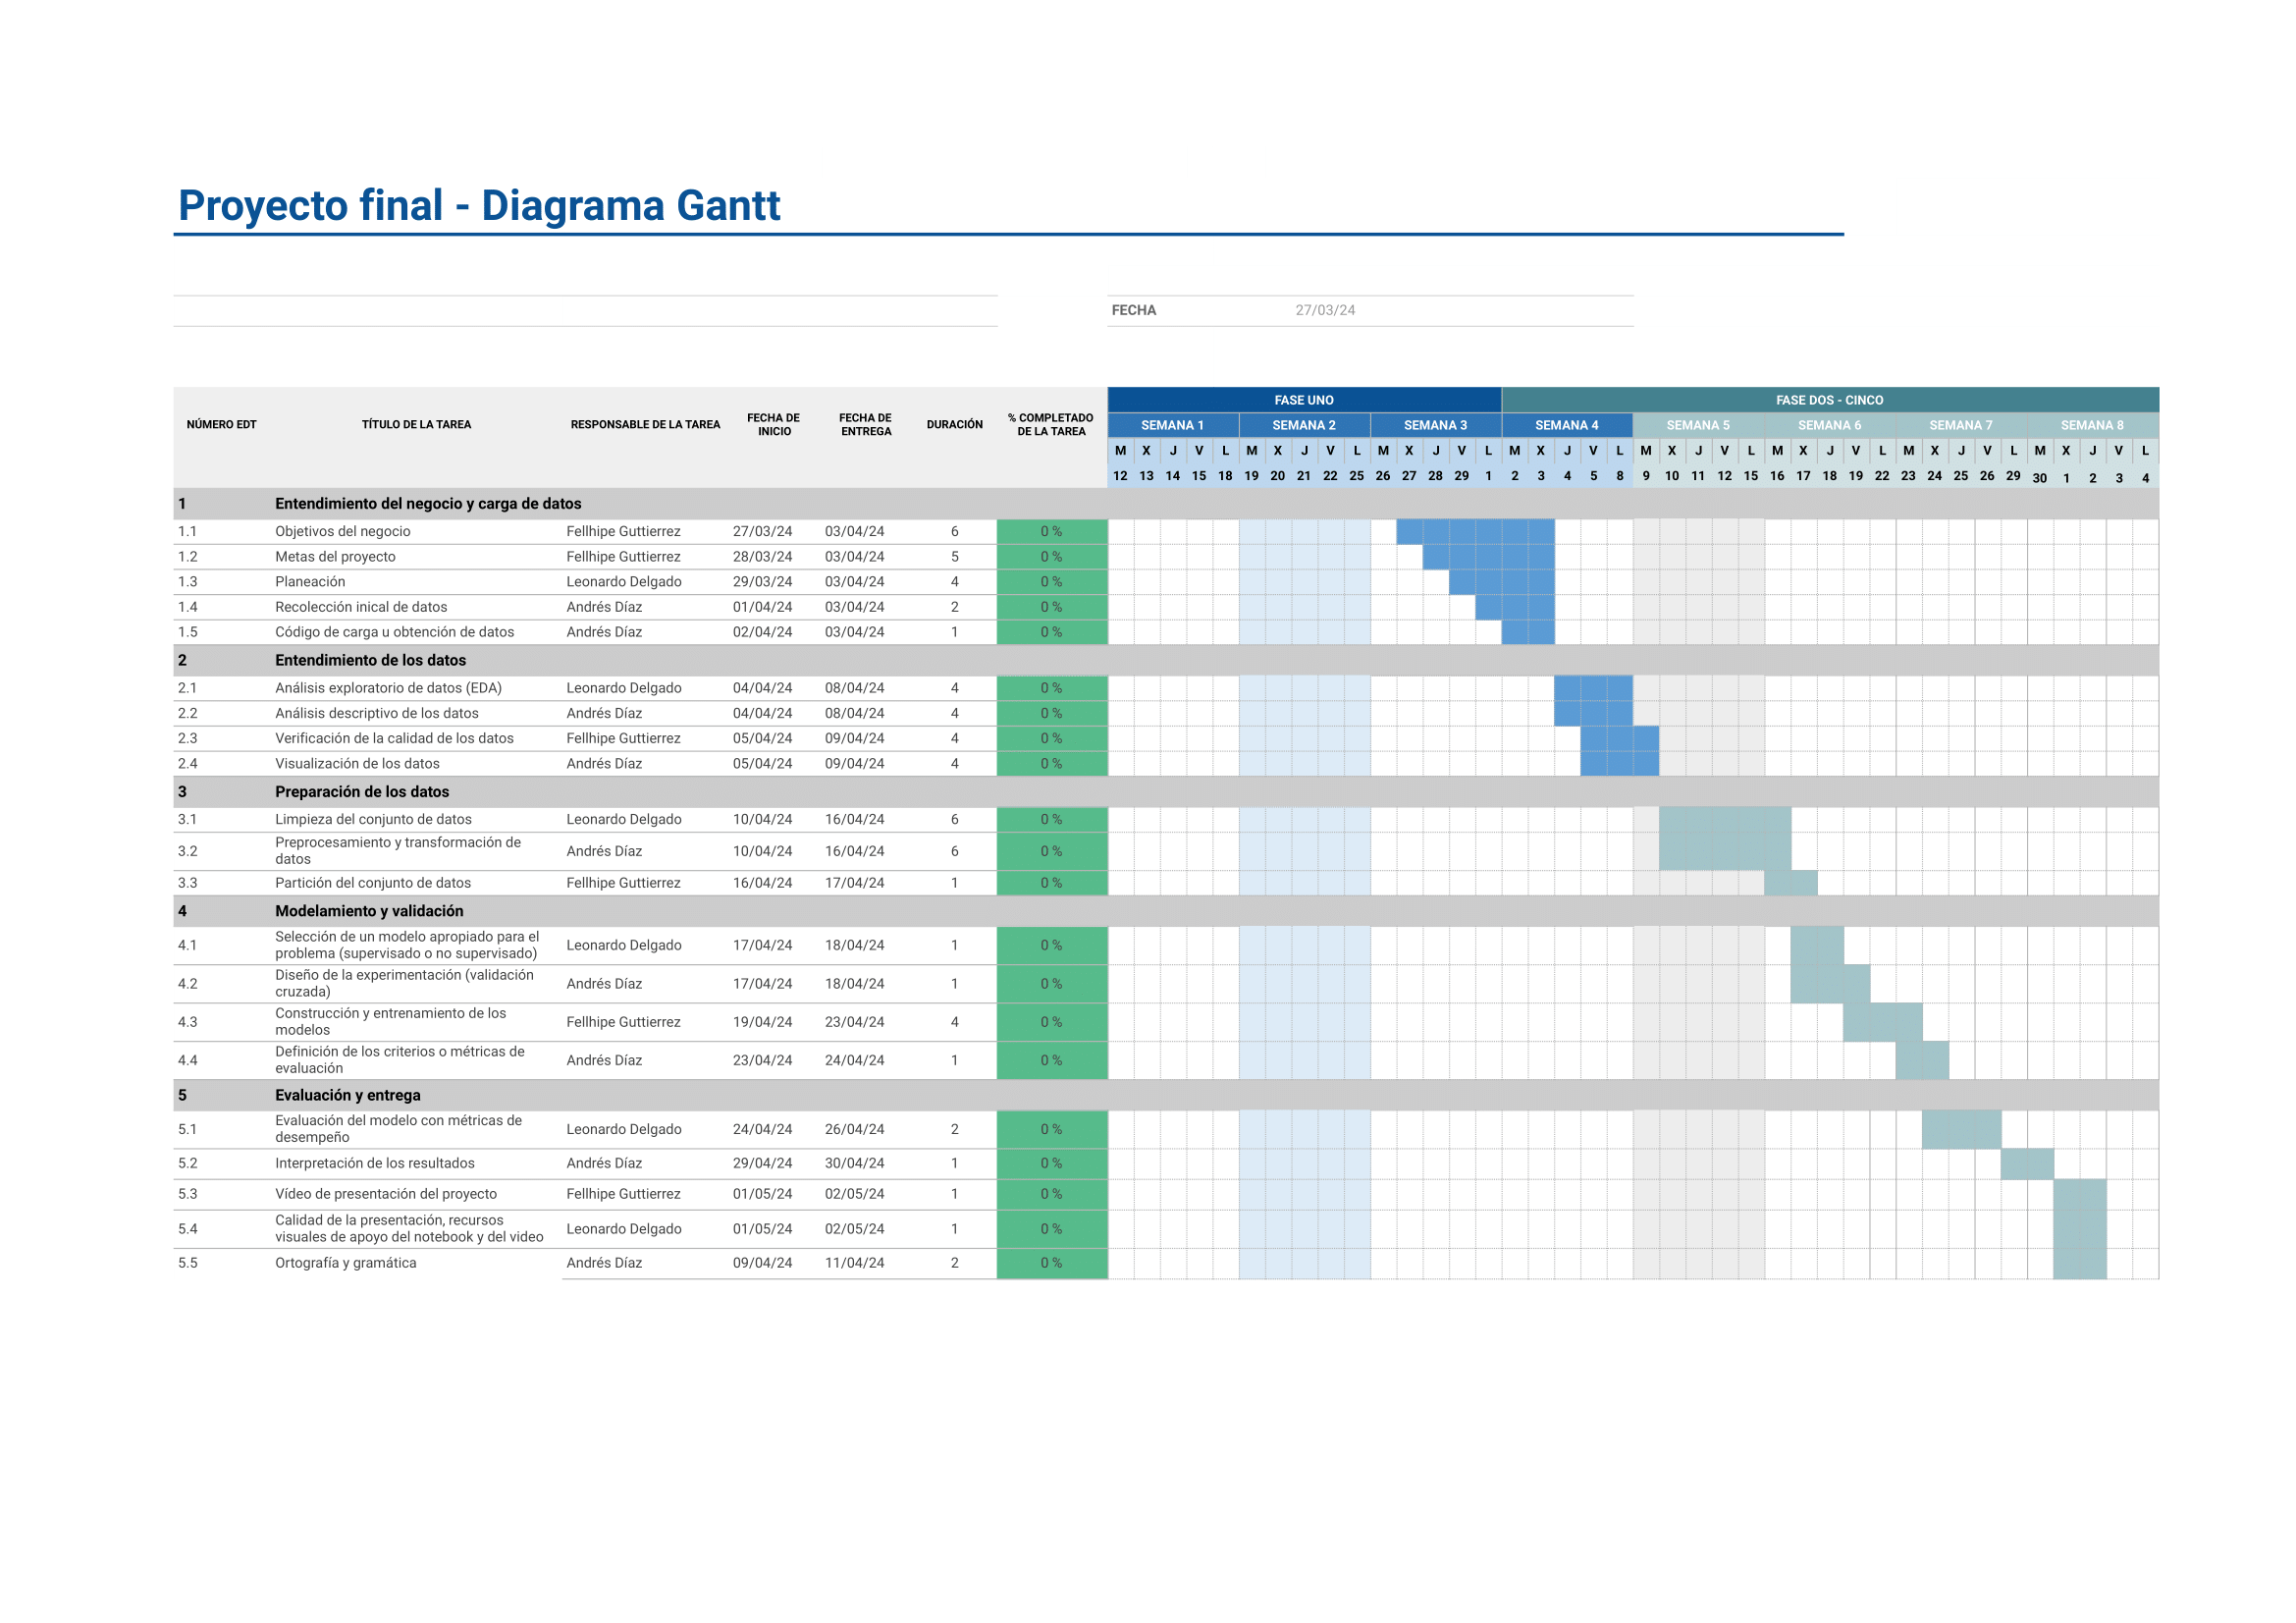

## **2. Datos**
---


### **2.1. Origen**
---

**¿De dónde vienen los datos?**
Los datos para este proyecto provienen de Home Credit, un proveedor internacional de financiamiento al consumo que se enfoca en ofrecer préstamos a personas con poca o ninguna historia crediticia. Home Credit comparte estos datos para el propósito específico de la competencia en Kaggle, facilitando así un conjunto de datos que incluye información relevante sobre el historial de préstamos, comportamiento de pago, transacciones financieras, y más, de sus clientes.

**¿Se usa alguna herramienta o proceso para la descarga de la información?**
La descarga de la información se realiza a través de la plataforma Kaggle, específicamente en la página de la competencia dedicada a este proyecto.

### **2.2. Carga y Adquisición de Datos**
---


#### **2.2.1 Obtener datos desde Kaggle**



In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'home-credit-credit-risk-model-stability:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F50160%2F7921029%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T234327Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3712cee925ec15840e24f09cd643f6ff94e90058853ff0e9c787b8e25c3f28d552e3ee4fdb1316d79c73be552b5e5fa67d4daabb87d134226a22998fe2ab0602d16c8c693cd25843fc6b38a436607899d3711e96a1eab45adee6efdc01e6e08d610aac97ace6ec5cf92a560ed4d1cfc9126b3611ff6861b09980a77b64c5c4e3ae22d7fa6db74962ef81cf6c1a0f6a796fb4a82f35c3b30dd7c90acdb517f6ab8ebb2725d67048588515e6ea5d598fc03808731ef868c2ff4b0bad7dc70658eb76173fc76d7a1a3f3f12a4c91738c32ebe551e13161d3c5f7ab323ca92f23643690c0817c8cbf9f08fe30f4b550a422f83942bd5b7436c1e81f43a0cfabfa058'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3375704785 bytes downloaded
Downloaded and uncompressed: home-credit-credit-risk-model-stability
Data source import complete.


#### **2.2.2 Carga**


In [ ]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

dataPath = "/kaggle/input/home-credit-credit-risk-model-stability/"

In [ ]:
def set_table_dtypes(df: pl.DataFrame) -> pl.DataFrame:
    # implement here all desired dtypes for tables
    # the following is just an example
    for col in df.columns:
        # last letter of column name will help you determine the type
        if col[-1] in ("P", "A"):
            df = df.with_columns(pl.col(col).cast(pl.Float64).alias(col))

    return df

In [ ]:
train_basetable = pl.read_csv(dataPath + "csv_files/train/train_base.csv")
train_static = pl.concat(
    [
        pl.read_csv(dataPath + "csv_files/train/train_static_0_0.csv").pipe(set_table_dtypes),
        pl.read_csv(dataPath + "csv_files/train/train_static_0_1.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
train_static_cb = pl.read_csv(dataPath + "csv_files/train/train_static_cb_0.csv").pipe(set_table_dtypes)
train_person_1 = pl.read_csv(dataPath + "csv_files/train/train_person_1.csv").pipe(set_table_dtypes)
train_credit_bureau_b_2 = pl.read_csv(dataPath + "csv_files/train/train_credit_bureau_b_2.csv").pipe(set_table_dtypes)

In [ ]:
test_basetable = pl.read_csv(dataPath + "csv_files/test/test_base.csv")
test_static = pl.concat(
    [
        pl.read_csv(dataPath + "csv_files/test/test_static_0_0.csv").pipe(set_table_dtypes),
        pl.read_csv(dataPath + "csv_files/test/test_static_0_1.csv").pipe(set_table_dtypes),
        pl.read_csv(dataPath + "csv_files/test/test_static_0_2.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
test_static_cb = pl.read_csv(dataPath + "csv_files/test/test_static_cb_0.csv").pipe(set_table_dtypes)
test_person_1 = pl.read_csv(dataPath + "csv_files/test/test_person_1.csv").pipe(set_table_dtypes)
test_credit_bureau_b_2 = pl.read_csv(dataPath + "csv_files/test/test_credit_bureau_b_2.csv").pipe(set_table_dtypes)

In [ ]:
train_static.head()

case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,…,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,…,str,str,f64,f64,str,f64,str,f64,str,f64,f64,f64,bool,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
0,null,null,1917.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,null,24.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""",null,null
1,null,null,3134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0.0""",3.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,null,18.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""",null,null
2,null,null,4937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,36.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
3,null,null,4643.6,0.0,0.0,1.0,0.0,2.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,1.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,12.0,0.0,0.0,null,"""a55475b1""",null,1.0,1.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
4,null,null,3390.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,24.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""","""AL""",null


In [ ]:
# We need to use aggregation functions in tables with depth > 1, so tables that contain num_group1 column or
# also num_group2 column.
train_person_1_feats_1 = train_person_1.group_by("case_id").agg(
    pl.col("mainoccupationinc_384A").max().alias("mainoccupationinc_384A_max"),
    (pl.col("incometype_1044T") == "SELFEMPLOYED").max().alias("mainoccupationinc_384A_any_selfemployed")
)

# Here num_group1=0 has special meaning, it is the person who applied for the loan.
train_person_1_feats_2 = train_person_1.select(["case_id", "num_group1", "housetype_905L"]).filter(
    pl.col("num_group1") == 0
).drop("num_group1").rename({"housetype_905L": "person_housetype"})

# Here we have num_goup1 and num_group2, so we need to aggregate again.
train_credit_bureau_b_2_feats = train_credit_bureau_b_2.group_by("case_id").agg(
    pl.col("pmts_pmtsoverdue_635A").max().alias("pmts_pmtsoverdue_635A_max"),
    (pl.col("pmts_dpdvalue_108P") > 31).max().alias("pmts_dpdvalue_108P_over31")
)

# We will process in this examples only A-type and M-type columns, so we need to select them.
selected_static_cols = []
for col in train_static.columns:
    if col[-1] in ("A", "M"):
        selected_static_cols.append(col)
print(selected_static_cols)

selected_static_cb_cols = []
for col in train_static_cb.columns:
    if col[-1] in ("A", "M"):
        selected_static_cb_cols.append(col)
print(selected_static_cb_cols)

# Join all tables together.
data = train_basetable.join(
    train_static.select(["case_id"]+selected_static_cols), how="left", on="case_id"
).join(
    train_static_cb.select(["case_id"]+selected_static_cb_cols), how="left", on="case_id"
).join(
    train_person_1_feats_1, how="left", on="case_id"
).join(
    train_person_1_feats_2, how="left", on="case_id"
).join(
    train_credit_bureau_b_2_feats, how="left", on="case_id"
)

['amtinstpaidbefduel24m_4187115A', 'annuity_780A', 'annuitynextmonth_57A', 'avginstallast24m_3658937A', 'avglnamtstart24m_4525187A', 'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A', 'credamount_770A', 'currdebt_22A', 'currdebtcredtyperange_828A', 'disbursedcredamount_1113A', 'downpmt_116A', 'inittransactionamount_650A', 'lastapprcommoditycat_1041M', 'lastapprcommoditytypec_5251766M', 'lastapprcredamount_781A', 'lastcancelreason_561M', 'lastotherinc_902A', 'lastotherlnsexpense_631A', 'lastrejectcommoditycat_161M', 'lastrejectcommodtypec_5251769M', 'lastrejectcredamount_222A', 'lastrejectreason_759M', 'lastrejectreasonclient_4145040M', 'maininc_215A', 'maxannuity_159A', 'maxannuity_4075009A', 'maxdebt4_972A', 'maxinstallast24m_3658928A', 'maxlnamtstart6m_4525199A', 'maxoutstandbalancel12m_4187113A', 'maxpmtlast3m_4525190A', 'previouscontdistrict_112M', 'price_1097A', 'sumoutstandtotal_3546847A', 'sumoutstandtotalest_4493215A', 'totaldebt_9A', 'totalsettled_863A', 'totinstallas

Es posible observar que, dada la naturaleza de las diversas fuentes de datos y de sus uniones, muchos de las observaciones cuentan con valores nulos en sus atributos.
Algunos de los atributos más llamativos a primera vista podrían ser:
-Última razón de rechazo

*   Elemento de lista
*   Elemento de lista
*   Último monto rechazado
*   Si la persona era o no independiente
*   El ingreso máximo


In [ ]:
data.describe()[[0,1]]

describe,case_id,date_decision,MONTH,WEEK_NUM,target,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,str,str,f64,str
"""count""",1.526659e6,"""1526659""",1.526659e6,1.526659e6,1.526659e6,965535.0,1.526659e6,1.526655e6,901784.0,162509.0,685478.0,499672.0,1.526659e6,1.526655e6,1.526655e6,1.526659e6,1.526659e6,192302.0,"""1526659""","""1526659""",1.084618e6,"""1526659""",3056.0,3058.0,"""1526659""","""1526659""",757613.0,"""1526659""","""1526659""",1.015404e6,1.22064e6,75933.0,1.22064e6,901784.0,493803.0,759701.0,397329.0,"""1526659""",1.303419e6,1.081339e6,686013.0,1.526656e6,1.526655e6,352448.0,"""1500476""","""1500476""","""1500476""","""1500476""","""1500476""",143589.0,114978.0,71845.0,572638.0,1.526659e6,"""1526659""","""100818""",36415.0,"""36415"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,561124.0,0.0,4.0,624875.0,1.36415e6,841181.0,1.026987e6,0.0,4.0,4.0,0.0,0.0,1.334357e6,"""0""","""0""",442041.0,"""0""",1.523603e6,1.523601e6,"""0""","""0""",769046.0,"""0""","""0""",511255.0,306019.0,1.450726e6,306019.0,624875.0,1.032856e6,766958.0,1.12933e6,"""0""",223240.0,445320.0,840646.0,3.0,4.0,1.174211e6,"""26183""","""26183""","""26183""","""26183""","""26183""",1.38307e6,1.411681e6,1.454814e6,954021.0,0.0,"""0""","""1425841""",1.490244e6,"""1490244"""


In [ ]:
data.sample(5)

case_id,date_decision,MONTH,WEEK_NUM,target,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31
i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,bool,str,f64,bool
2537228,"""2019-01-28""",201901,3,0,null,5169.6,4377.0,2493.6,null,null,null,50000.0,26973.0,0.0,27079.125,0.0,null,"""P109_133_183""","""a55475b1""",24000.0,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",18000.0,4420.0,null,12918.601,4380.2,null,null,null,"""P93_144_147""",0.0,26973.0,null,26973.0,22482.0,null,null,null,null,null,null,null,null,null,null,16000.0,false,null,null,null
1638963,"""2019-11-18""",201911,45,0,234168.48,1794.8,0.0,12092.8,null,12928.25,10855.8,44914.0,0.0,0.0,29914.0,0.0,29914.0,"""P148_110_5""","""a55475b1""",30946.0,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",20000.0,"""P198_131_9""","""P94_109_143""",40000.0,229838.73,null,157778.11,20656.0,30946.0,97246.37,8610.4,"""P91_101_191""",29914.0,0.0,0.0,0.0,472576.6,null,"""a55475b1""","""6b2ae0fa""","""a55475b1""","""a7fcb6e5""","""a55475b1""",null,null,null,null,90000.0,false,null,null,null
1711943,"""2019-12-27""",201912,51,1,23854.6,1666.6,3341.2,3975.8,26998.0,26871.1,3776.2,29998.0,30234.8,30234.8,29998.0,0.0,null,"""P100_96_175""","""a55475b1""",3040.0,"""P85_114_140""",null,null,"""a55475b1""","""a55475b1""",100000.0,"""P99_56_166""","""P30_86_84""",50000.0,5000.0,null,14071.2,4974.0,16541.6,36874.8,3341.4001,"""P147_21_170""",29998.0,30234.8,30234.8,30234.8,28500.0,6682.8003,"""a55475b1""","""a55475b1""","""a55475b1""","""a7fcb6e5""","""a55475b1""",null,null,null,null,40000.0,false,null,null,null
1005036,"""2020-08-15""",202008,84,0,null,2394.0,0.0,null,null,null,null,22800.0,0.0,0.0,22800.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,"""a55475b1""",22800.0,null,null,0.0,0.0,null,"""2fc785b2""","""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,15056.4,null,50000.0,false,null,null,null
161496,"""2019-09-23""",201909,37,1,0.0,3585.4001,0.0,null,null,367.7,8086.8003,40000.0,0.0,0.0,40000.0,0.0,null,"""a55475b1""","""a55475b1""",30000.0,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",7000.0,19085.4,null,20647.123,null,null,14902.601,null,"""P117_87_136""",null,0.0,0.0,0.0,64955.402,null,"""a55475b1""","""a55475b1""","""a55475b1""","""b6cabe76""","""a55475b1""",5476.0,5476.0,null,null,50000.0,false,null,null,null


In [ ]:
#data.describe.row(by_predicate=(pl.col("column") == "currdebtcredtyperange_828A"))
#describe_data.row(by_predicate=(pl.col("column") == "currdebtcredtyperange_828A"))

## **2.3. Análisis exploratorio de los datos**


---



### 2.3.0. Pre selección de features
Teniendo en cuenta que el dataset viene con 58 Columnas y hace el ejercicio de exploración de datos muy complicado. Decidimos revisar las [definiciones de los features](https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability/data) y escogimos las 10 features más importantes de acuerdo al objetivo del algoritmo con base en nuestro conocimiento del negocio


#### Features Seleccionados

1. **Credit Amount (`credamount_770A`)**: El monto del crédito solicitado o el límite de la tarjeta de crédito es fundamental para evaluar la capacidad de endeudamiento del solicitante.

2. **Monthly Annuity Amount (`annuity_780A`)**: La cantidad de la anualidad mensual proporciona información sobre las obligaciones financieras mensuales del solicitante.

3. **Current Debt Amount (`currdebt_22A`)**: El monto de la deuda actual del cliente es importante para evaluar su nivel de endeudamiento actual y su capacidad para manejar nuevas obligaciones financieras.

4. **Total Debt (`totaldebt_9A`)**: La cantidad total de deuda del solicitante proporciona una imagen más completa de su situación financiera y su capacidad de pago.

5. **Primary Income Amount (`maininc_215A`)**: El monto del ingreso principal del cliente es esencial para evaluar su capacidad de pago y estabilidad financiera.

6. **Marital Status (`maritalst_385M` o `maritalst_893M`)**: El estado civil del solicitante puede proporcionar información adicional sobre su estabilidad financiera y responsabilidad.

7. **Average Installments Paid in Last 24 Months (`avginstallast24m_3658937A`)**: Este feature refleja el historial de pagos del solicitante, lo cual es crucial para evaluar su comportamiento de pago y su capacidad para cumplir con las obligaciones financieras.

8. **Average Loan Amount in Last 24 Months (`avglnamtstart24m_4525187A`)**: Proporciona información sobre los préstamos previamente obtenidos por el solicitante y su capacidad para manejar montos similares en el futuro.

9. **Last Application's Credit Amount (`lastapprcredamount_781A`)**: El monto del crédito solicitado en la última aplicación puede indicar la evolución de las necesidades financieras del solicitante.

10. **Maximal Annuity Offered in Current Application (`maxannuity_4075009A`)**: El monto máximo de la anualidad ofrecida en la solicitud actual puede indicar el nivel máximo de obligaciones financieras que el solicitante está dispuesto a asumir.

#### Nota
1. La selección de estos features se basa en su importancia en la evaluación de la capacidad de pago y el riesgo crediticio de los solicitantes.
2. En la competencia se menciona que hay _Columnas especiales_ estas columnas sirven para hacer agregaciones y no son pensadas como predictores, por esta razón los quitamos de la data y solo nos quedamos con el identificador principal `case_id` y la etiqueta (nuestro Y) `target`



In [ ]:
selected_features = [
    'credamount_770A',
    'annuity_780A',
    'currdebt_22A',
    'totaldebt_9A',
    'maininc_215A',
    'maritalst_385M',
    'maritalst_893M',
    'avginstallast24m_3658937A',
    'avglnamtstart24m_4525187A',
    'lastapprcredamount_781A',
    'lastrejectcredamount_222A',
    'maxannuity_4075009A'
]
special_columns = ['case_id', 'target']#, 'date_decision', 'MONTH', 'WEEK_NUM','target', 'num_group1', 'num_group2']

In [ ]:
total_data = data.shape[0]
for i in selected_features:
    print(f"Para el feature {i} hay un {data[i].is_null().sum()/total_data * 100}% de datos nulos")

Para el feature credamount_770A hay un 0.0% de datos nulos
Para el feature annuity_780A hay un 0.0% de datos nulos
Para el feature currdebt_22A hay un 0.00026201004939544457% de datos nulos
Para el feature totaldebt_9A hay un 0.0001965075370465834% de datos nulos
Para el feature maininc_215A hay un 33.488486950917% de datos nulos
Para el feature maritalst_385M hay un 1.715052280830231% de datos nulos
Para el feature maritalst_893M hay un 1.715052280830231% de datos nulos
Para el feature avginstallast24m_3658937A hay un 40.93088240399461% de datos nulos
Para el feature avglnamtstart24m_4525187A hay un 89.35525222069892% de datos nulos
Para el feature lastapprcredamount_781A hay un 28.954796061202927% de datos nulos
Para el feature lastrejectcredamount_222A hay un 50.37444511184227% de datos nulos
Para el feature maxannuity_4075009A hay un 95.02619772981392% de datos nulos




*   Podemos observar que `maritalst_385M` y `maritalst_893M` tienen la misma cantidad de dtaos nulos, así que podemos elimnar a uno solo y quedarnos con uno solo.
*   Podemos observar que el feature con más datos nulos es `maxannuity_4075009A` con un 95% sin embargo, el 5% restante de un millón y medio de datos es aproximadamente 75mil datos lo cual es considerable




In [ ]:
selected_features.pop(selected_features.index('maritalst_893M'))

'maritalst_893M'

In [ ]:
train_data = data[special_columns + selected_features]

In [ ]:
train_data.columns


['case_id',
 'target',
 'credamount_770A',
 'annuity_780A',
 'currdebt_22A',
 'totaldebt_9A',
 'maininc_215A',
 'maritalst_385M',
 'avginstallast24m_3658937A',
 'avglnamtstart24m_4525187A',
 'lastapprcredamount_781A',
 'lastrejectcredamount_222A',
 'maxannuity_4075009A']

Por comodidad cambiamos los nombres de los features por nombres más legibles

In [ ]:
feature_dict = {'credamount_770A': 'amount',
         'annuity_780A': 'annuity',
         'currdebt_22A': 'current_debt',
         'totaldebt_9A': 'total_debt',
        'maininc_215A': 'main_income',
        'maritalst_385M': 'marital_state',
        'avginstallast24m_3658937A': 'instalments_paid',
        'avglnamtstart24m_4525187A': 'loans_started',
        'lastapprcredamount_781A': 'last_approved_loan',
        'lastrejectcredamount_222A': 'last_rejected_loan',
        'maxannuity_4075009A': 'max_annuity'}
train_data = train_data.rename(feature_dict)

Añadimos una columna de checkeo para los features con más información faltante

In [ ]:
important_missing_features = ['main_income', 'instalments_paid', 'loans_started', 'last_approved_loan', 'last_rejected_loan', 'max_annuity']

for i in important_missing_features:
    train_data = train_data.with_columns(pl.col(i).is_null().alias(f'null_{i}'))

### 2.3.1. Resumen general

¿Cuántos documentos tiene el dataset?
¿En qué formato están almacenados los datos?
¿Qué tamaño en MB tiene el conjunto de datos?

In [ ]:
train_data.head()

case_id,target,amount,annuity,current_debt,total_debt,main_income,marital_state,instalments_paid,loans_started,last_approved_loan,last_rejected_loan,max_annuity,null_main_income,null_instalments_paid,null_loans_started,null_last_approved_loan,null_last_rejected_loan,null_max_annuity
i64,i64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,bool,bool,bool,bool,bool,bool
0,0,30000.0,1917.6,0.0,0.0,null,null,null,null,null,null,null,true,true,true,true,true,true
1,0,19999.8,3134.0,0.0,0.0,null,null,null,null,null,null,null,true,true,true,true,true,true
2,0,78000.0,4937.0,0.0,0.0,null,null,null,null,null,10000.0,null,true,true,true,true,false,true
3,0,40000.0,4643.6,0.0,0.0,null,null,null,null,null,59999.8,null,true,true,true,true,false,true
4,1,44000.0,3390.2,0.0,0.0,null,null,null,null,null,null,null,true,true,true,true,true,true


In [ ]:
train_data.describe()

describe,case_id,target,amount,annuity,current_debt,total_debt,main_income,marital_state,instalments_paid,loans_started,last_approved_loan,last_rejected_loan,max_annuity,null_main_income,null_instalments_paid,null_loans_started,null_last_approved_loan,null_last_rejected_loan,null_max_annuity
str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,str,str,str,str,str
"""count""",1.526659e6,1.526659e6,1.526659e6,1.526659e6,1.526655e6,1.526656e6,1.015404e6,"""1500476""",901784.0,162509.0,1.084618e6,757613.0,75933.0,"""1526659""","""1526659""","""1526659""","""1526659""","""1526659""","""1526659"""
"""null_count""",0.0,0.0,0.0,0.0,4.0,3.0,511255.0,"""26183""",624875.0,1.36415e6,442041.0,769046.0,1.450726e6,"""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",1.2861e6,0.031437,49870.159834,4039.207272,19682.42186,19683.115099,49485.651919,null,5401.587636,44717.566753,36890.349425,51049.049613,41559.724362,null,null,null,null,null,null
"""std""",718946.592285,0.174496,44183.69401,3006.607629,50835.282711,50836.034256,32264.136044,null,6531.562344,44844.78673,37004.784004,53172.006146,85729.972801,null,null,null,null,null,null
"""min""",0.0,0.0,2000.0,80.8,0.0,0.0,0.0,"""3439d993""",0.0,0.0,0.0,0.0,600.0,"""False""","""False""","""False""","""False""","""False""","""False"""
"""25%""",766198.0,0.0,19998.0,1967.6,0.0,0.0,30000.0,null,2528.4001,15682.601,12900.0,16198.0,10000.0,null,null,null,null,null,null
"""50%""",1.357358e6,0.0,35199.402,3151.8,0.0,0.0,40000.0,null,4068.6,28419.4,24774.0,33998.0,15020.0,null,null,null,null,null,null
"""75%""",1.739023e6,0.0,63980.0,5231.4,13492.2,13493.0,60000.0,null,6551.8003,56334.2,47998.0,66000.0,23600.0,null,null,null,null,null,null
"""max""",2.703454e6,1.0,950000.0,106007.0,1210629.1,1210629.1,200000.0,"""ecd83604""",496148.8,513520.0,400000.0,1e6,601320.0,"""True""","""True""","""True""","""True""","""True""","""True"""


In [ ]:
data_size = data.estimated_size('gb')
print(f'Tamaño del dataset: {data_size} GB')

Tamaño del dataset: 0.8144469540566206 GB


In [ ]:
train_data_size = train_data.estimated_size('gb')
print(f'Tamaño del dataset: {data_size} GB')

Tamaño del dataset: 0.8144469540566206 GB


El dataset tiene un tamaño de 0.81 GB y está en formato .csv

### 2.3.2. Resumen de la calidad de los datos
- ¿Se detecta la ausencia de datos, la presencia de documentos vacíos o la existencia de datos de baja calidad en el conjunto?

- ¿Se identifican documentos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?

- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?

- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

In [ ]:
unique_case_id = data['case_id'].n_unique()
n_case_id = data['case_id'].count()


print(f"Cantidad de personas (o registros únicos): {unique_case_id}")
print(f"Cantidad total de personas: {n_case_id}")

Cantidad de personas (o registros únicos): 1526659
Cantidad total de personas: 1526659


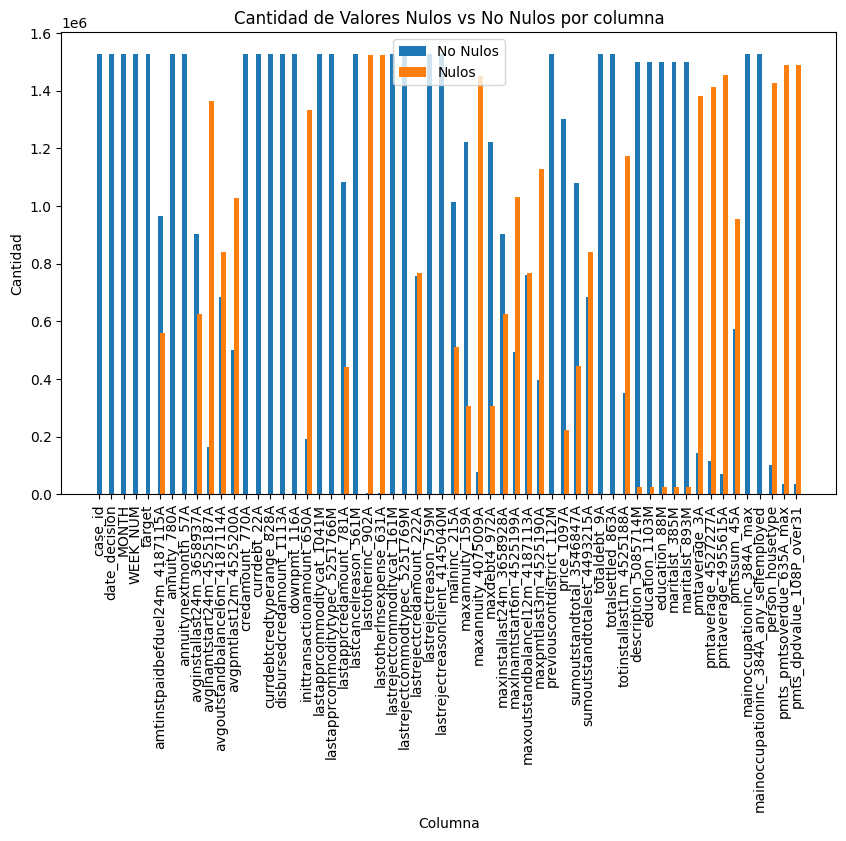

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# Primero, calculamos el número de valores nulos por columna
describe_data = data.describe()[[0,1]]

# Luego, convertimos este resultado en un DataFrame para facilitar la visualización
describe_data = describe_data.transpose(include_header=True, column_names=['count', 'null_count'])

describe_data = describe_data.filter(pl.col("column") != 'describe')
describe_data = describe_data.select(
    pl.col('column'),
    pl.col('count').cast(pl.Float64),
    pl.col('null_count').cast(pl.Float64))

# Extrayendo los datos para graficar
columns = describe_data.to_series(0).to_list()
counts =  describe_data.to_series(1).to_list()
null_counts =  describe_data.to_series(2).to_list()

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))

# Índices de las posiciones de las columnas para el eje X
x = range(len(columns))

# Graficar ambas 'count' y 'null_count' como barras
ax.bar(x, counts, width=0.4, label='No Nulos', align='center')
ax.bar(x, null_counts, width=0.4, label='Nulos', align='edge')

# Etiquetas del eje X
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=90)

# Títulos y etiquetas
ax.set_xlabel('Columna')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de Valores Nulos vs No Nulos por columna')
ax.legend()

plt.show()

Se ve que varias características del dataset tienen muchos valores nulos, en algunos casos, los valores nulos representan más del 50% de registros de la característica.

### 2.3.3. Tipos de variables

¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

La variable objetivo a estimar para este caso es la llamada "target"

In [ ]:
data['target'].hist()

break_point,category,count
f64,cat,u32
-1.0,"""(-inf, -1.0]""",0
0.0,"""(-1.0, 0.0]""",1478665
1.0,"""(0.0, 1.0]""",47994
inf,"""(1.0, inf]""",0


Se puede observar que hay un desbalanceo de los datos de la variable objetivo.

In [ ]:
47994/(47994+1478665)*100

3.1437275776712417

In [ ]:
print(train_data.columns)

for feature in train_data.columns:
  if train_data[feature].dtype in ['Float64', 'Int64']:
    print(train_data[feature].hist())
  #data[feature].hist()

['case_id', 'target', 'amount', 'annuity', 'current_debt', 'total_debt', 'main_income', 'marital_state', 'instalments_paid', 'loans_started', 'last_approved_loan', 'last_rejected_loan', 'max_annuity', 'null_main_income', 'null_instalments_paid', 'null_loans_started', 'null_last_approved_loan', 'null_last_rejected_loan', 'null_max_annuity']


In [ ]:
train_data.columns

['case_id',
 'target',
 'amount',
 'annuity',
 'current_debt',
 'total_debt',
 'main_income',
 'marital_state',
 'instalments_paid',
 'loans_started',
 'last_approved_loan',
 'last_rejected_loan',
 'max_annuity',
 'null_main_income',
 'null_instalments_paid',
 'null_loans_started',
 'null_last_approved_loan',
 'null_last_rejected_loan',
 'null_max_annuity']

### 2.3.4. Relación entre variables

In [ ]:
train_data.to_numpy()

array([[0, 0, 30000.0, ..., True, True, True],
       [1, 0, 19999.8, ..., True, True, True],
       [2, 0, 78000.0, ..., True, False, True],
       ...,
       [2703452, 0, 60000.0, ..., False, True, True],
       [2703453, 0, 6000.0, ..., False, False, True],
       [2703454, 0, 39414.0, ..., False, True, True]], dtype=object)

In [ ]:
print(train_data.select([pl.col(pl.Utf8), pl.col(pl.Int64), pl.col(pl.Float64)]))

shape: (1_526_659, 13)
┌────────────┬─────────┬────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ marital_st ┆ case_id ┆ target ┆ amount   ┆ … ┆ loans_star ┆ last_appro ┆ last_rejec ┆ max_annuit │
│ ate        ┆ ---     ┆ ---    ┆ ---      ┆   ┆ ted        ┆ ved_loan   ┆ ted_loan   ┆ y          │
│ ---        ┆ i64     ┆ i64    ┆ f64      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str        ┆         ┆        ┆          ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞════════════╪═════════╪════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ null       ┆ 0       ┆ 0      ┆ 30000.0  ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ null       ┆ 1       ┆ 0      ┆ 19999.8  ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ null       ┆ 2       ┆ 0      ┆ 78000.0  ┆ … ┆ null       ┆ null       ┆ 10000.0    ┆ null       │
│ null       ┆ 3       ┆ 0      ┆ 40000.0  ┆ … ┆ null       ┆ null  

In [ ]:
train_data.select([pl.col(pl.Int64), pl.col(pl.Float64)]).corr()

case_id,target,amount,annuity,current_debt,total_debt,main_income,instalments_paid,loans_started,last_approved_loan,last_rejected_loan,max_annuity
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.003834,0.090351,0.101809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.003834,1.0,0.026277,0.013838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.090351,0.026277,1.0,0.819523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.101809,0.013838,0.819523,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns

<Axes: >

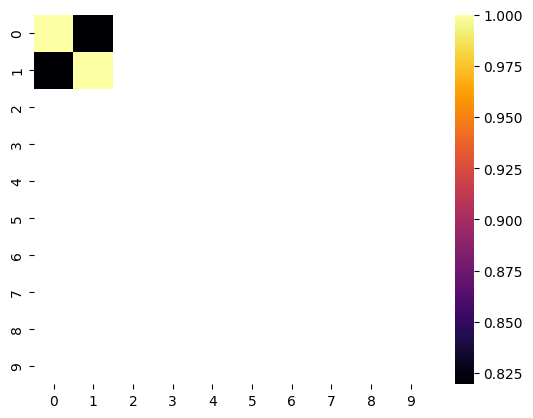

In [ ]:
sns.heatmap(train_data.select(feature_dict.values()).select([pl.col(pl.Int64), pl.col(pl.Float64)]).corr(), cmap = 'inferno')
#train_data.select([pl.col(pl.Int64), pl.col(pl.Float64)]).corr()

## **2.4. Limpieza de datos**


---


### **2.4.1 Eliminar datos nulos**


Después de la exploración de datos, identificamos que hay algunas columnas que tienen un número muy pequeño de datos nulos, estas columnas son:


*   current_debt
*   total_debt
*   marital_state



In [ ]:
columns_with_nulls = ['current_debt', 'total_debt', 'marital_state']
for i in columns_with_nulls:
  print(f"la columna {i} tiene {train_data[i].is_null().sum()} datos nulos")

la columna current_debt tiene 4 datos nulos
la columna total_debt tiene 3 datos nulos
la columna marital_state tiene 26183 datos nulos


procedemos a eliminar las filas con datos nulos

In [ ]:
train_data = train_data.drop_nulls(columns_with_nulls)

### **2.4.2 Análisis de Correlaciones después de preprocesar**


In [ ]:
nulls_correlations = train_data.select([pl.col(pl.Boolean)]).corr()
nulls_correlations

null_main_income,null_instalments_paid,null_loans_started,null_last_approved_loan,null_last_rejected_loan,null_max_annuity
f64,f64,f64,f64,f64,f64
1.0,0.704023,0.166018,0.898809,0.239215,0.138878
0.704023,1.0,0.289985,0.766764,0.235355,0.144176
0.166018,0.289985,1.0,0.222403,0.095659,0.01449
0.898809,0.766764,0.222403,1.0,0.284931,0.147335
0.239215,0.235355,0.095659,0.284931,1.0,0.023511
0.138878,0.144176,0.01449,0.147335,0.023511,1.0


<Axes: >

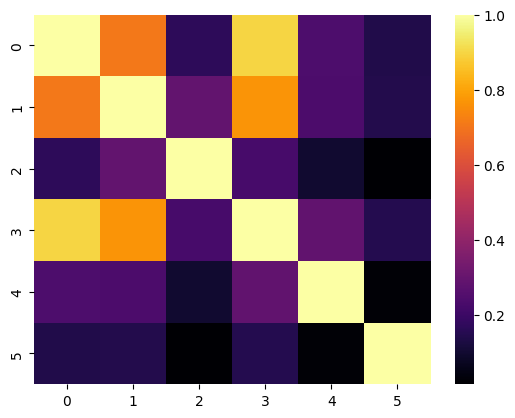

In [ ]:
sns.heatmap(nulls_correlations, cmap='inferno')

In [ ]:
floats_correlations = train_data.select([pl.col(pl.Float64)]).drop_nulls().corr()
floats_correlations

amount,annuity,current_debt,total_debt,main_income,instalments_paid,loans_started,last_approved_loan,last_rejected_loan,max_annuity
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.804214,0.183222,0.183222,0.084655,0.124029,0.194278,0.198237,0.134987,0.172542
0.804214,1.0,0.069651,0.069651,0.096353,0.131203,0.181395,0.191258,0.114742,0.162475
0.183222,0.069651,1.0,1.0,0.085748,0.005184,0.512665,0.498258,0.039453,0.079687
0.183222,0.069651,1.0,1.0,0.085749,0.005184,0.512664,0.498257,0.039455,0.079686
0.084655,0.096353,0.085748,0.085749,1.0,0.104376,0.216788,0.215815,0.043045,0.017263
0.124029,0.131203,0.005184,0.005184,0.104376,1.0,0.395014,0.336761,0.10128,0.036495
0.194278,0.181395,0.512665,0.512664,0.216788,0.395014,1.0,0.897086,0.0979,0.092242
0.198237,0.191258,0.498258,0.498257,0.215815,0.336761,0.897086,1.0,0.087489,0.093167
0.134987,0.114742,0.039453,0.039455,0.043045,0.10128,0.0979,0.087489,1.0,-0.029674


<Axes: >

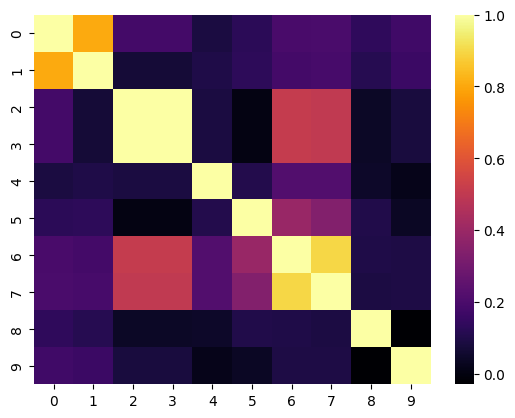

In [ ]:
sns.heatmap(floats_correlations, cmap='inferno', xticklabels=True, yticklabels=True)

Observamos que hay una gran correlación entre `current_debt` y `total_debt`
también hay correlación entre `last_approved_loan` y `loans_started`
y entre `amount` y `annuity`

In [ ]:
targets_debts_differ = train_data.filter(pl.col("current_debt") != pl.col("total_debt"))["target"]
targets_debts_same = train_data.filter(pl.col("current_debt") == pl.col("total_debt"))["target"]


In [ ]:
target_1_num = (targets_debts_differ == 1).sum()
target_0_num = (targets_debts_differ == 0).sum()
print(f"Cuando total y current debt difieren, el # de target 0 es: {target_0_num}")
print(f"Cuando total y current debt difieren, el # de target 1 es: {target_1_num}")
print(f"porcentaje de 1s: {target_1_num/(target_1_num + target_0_num)}")

Cuando total y current debt difieren, el # de target 0 es: 2622
Cuando total y current debt difieren, el # de target 1 es: 411
porcentaje de 1s: 0.13550939663699307


In [ ]:
target_1_num = (targets_debts_same == 1).sum()
target_0_num = (targets_debts_same == 0).sum()
print(f"Cuando total y current debt son iguales, el # de target 0 es: {target_0_num}")
print(f"Cuando total y current debt son iguales, el # de target 1 es: {target_1_num}")
print(f"porcentaje de 1s: {target_1_num/(target_1_num + target_0_num)}")

Cuando total y current debt son iguales, el # de target 0 es: 1450635
Cuando total y current debt son iguales, el # de target 1 es: 46804
porcentaje de 1s: 0.03125603113048345


### **2.4.3 Data Augmentation**


Siguiendo algunas estrategias para aumentar los datos y mejorar el desempeño de modelos para datos tabulares, procedemos a crear las siguientes columnas
- target

<Axes: >

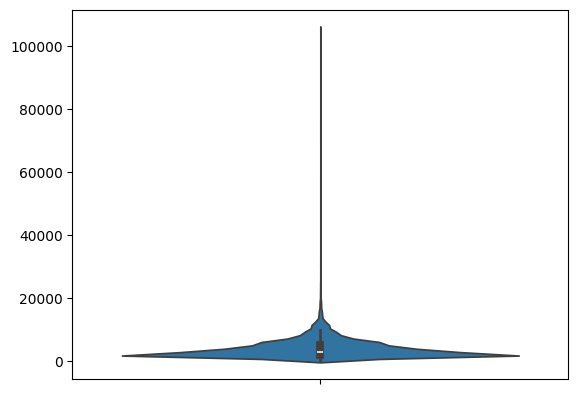

In [ ]:
sns.violinplot(train_data["annuity"])

<Axes: >

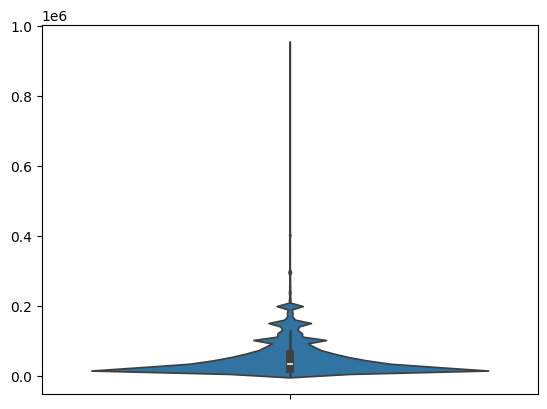

In [ ]:
sns.violinplot(train_data["amount"])

<Axes: >

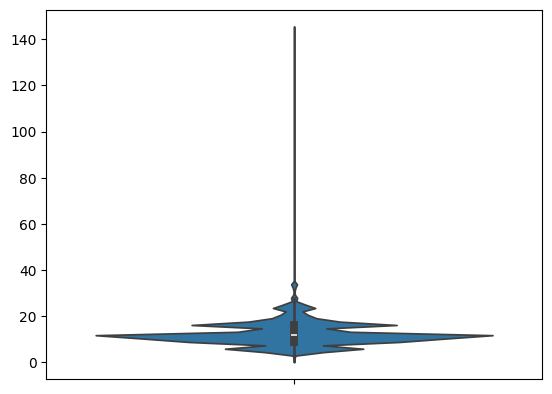

In [ ]:
sns.violinplot(train_data["amount"]/train_data["annuity"])

La relación entre amount y annuity puede ser importante, pues representa a grands rasgos por cuanto tiempo será el préstamo

In [ ]:
train_data = train_data.with_columns(
      (pl.col('amount')/pl.col('annuity')).alias('amount_annuity_ratio')
  )

Observamos que estas dos variables annuity y amount tienen un conjunto muy grande de outliers. agreagremos una nueva columna para identificar a los que están por encima del tercer cuartil

In [ ]:
large_distributed_columns = ['annuity', 'amount', 'amount_annuity_ratio']
for i in large_distributed_columns:
  third_quartile = train_data[i].quantile(0.75)
  train_data = train_data.with_columns(
      pl.when(train_data[i] > third_quartile)
      .then(pl.lit(True))
      .otherwise(pl.lit(False))
      .alias(f'high_{i}')
  )

Volvemos a ver las distribucións filtrando por las que NO son high

<Axes: >

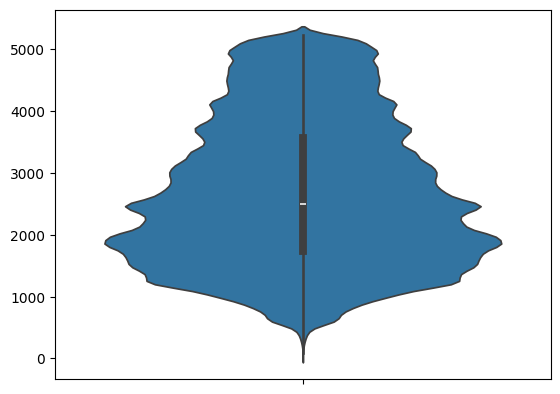

In [ ]:
sns.violinplot(train_data.filter(pl.col('high_annuity') == False)["annuity"])

<Axes: >

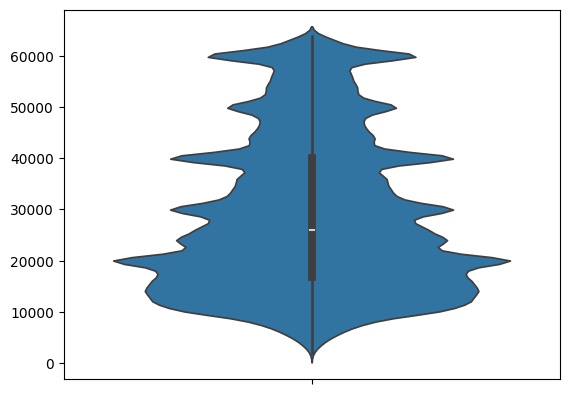

In [ ]:
sns.violinplot(train_data.filter(pl.col('high_amount') == False)["amount"])

<Axes: >

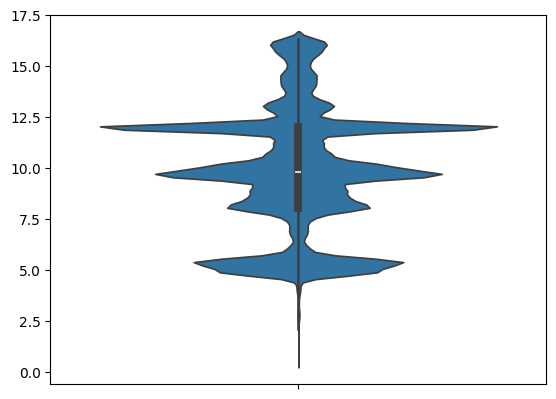

In [ ]:
sns.violinplot(train_data.filter(pl.col('high_amount_annuity_ratio') == False)["amount_annuity_ratio"])

¿Cuál es la probabilidad de préstamo cuando el amount es alto, el annuity es alto y/o el ratio entr ellas es alto?

In [ ]:
hhh_condition = pl.col('high_amount_annuity_ratio') & pl.col('high_amount') & pl.col('high_annuity')
hhl_condition = pl.col('high_amount_annuity_ratio') & pl.col('high_amount') & ~pl.col('high_annuity')
hlh_condition = pl.col('high_amount_annuity_ratio') & ~pl.col('high_amount') & pl.col('high_annuity')
hll_condition = pl.col('high_amount_annuity_ratio') & ~pl.col('high_amount') & ~pl.col('high_annuity')
lhh_condition = ~pl.col('high_amount_annuity_ratio') & pl.col('high_amount') & pl.col('high_annuity')
lhl_condition = ~pl.col('high_amount_annuity_ratio') & pl.col('high_amount') & ~pl.col('high_annuity')
llh_condition = ~pl.col('high_amount_annuity_ratio') & ~pl.col('high_amount') & pl.col('high_annuity')
lll_condition = ~pl.col('high_amount_annuity_ratio') & ~pl.col('high_amount') & ~pl.col('high_annuity')

In [ ]:
hhh_target_prob = train_data.filter(hhh_condition)["target"].mean()
hhl_target_prob = train_data.filter(hhl_condition)["target"].mean()
hlh_target_prob = train_data.filter(hlh_condition)["target"].mean()
hll_target_prob = train_data.filter(hll_condition)["target"].mean()
lhh_target_prob = train_data.filter(lhh_condition)["target"].mean()
lhl_target_prob = train_data.filter(lhl_condition)["target"].mean()
llh_target_prob = train_data.filter(llh_condition)["target"].mean()
lll_target_prob = train_data.filter(lll_condition)["target"].mean()

In [ ]:
print(hhh_target_prob)
print(hhl_target_prob)
print(hlh_target_prob)
print(hll_target_prob)
print(lhh_target_prob)
print(lhl_target_prob)
print(llh_target_prob)
print(lll_target_prob)

0.04927937236222265
0.03266091627784624
None
0.02882582081246522
0.031242540324872402
0.046882362179990575
0.024813136366311578
0.030041598226645174


Ningún dato cumple la condición número 3 (hlh)

In [ ]:
train_data = train_data.with_columns(
    pl.when(hhh_condition).then(pl.lit(hhh_target_prob))
    .when(hhl_condition).then(pl.lit(hhl_target_prob))
    .when(hlh_condition).then(pl.lit(hlh_target_prob))
    .when(hll_condition).then(pl.lit(hll_target_prob))
    .when(lhh_condition).then(pl.lit(lhh_target_prob))
    .when(lhl_condition).then(pl.lit(lhl_target_prob))
    .when(llh_condition).then(pl.lit(llh_target_prob))
    .when(lll_condition).then(pl.lit(lll_target_prob))
    .alias('target_probability_annuity_ammount')
)

In [ ]:
train_data

case_id,target,amount,annuity,current_debt,total_debt,main_income,marital_state,instalments_paid,loans_started,last_approved_loan,last_rejected_loan,max_annuity,null_main_income,null_instalments_paid,null_loans_started,null_last_approved_loan,null_last_rejected_loan,null_max_annuity,amount_annuity_ratio,high_annuity,high_amount,high_amount_annuity_ratio,target_probability_annuity_ammount
i64,i64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,bool,bool,bool,bool,bool,bool,f64,bool,bool,bool,f64
357,0,94000.0,7433.4,0.0,0.0,null,"""a55475b1""",null,null,null,null,null,true,true,true,true,true,true,12.645626,true,true,false,0.031243
381,0,40600.0,2593.2,0.0,0.0,null,"""a55475b1""",null,null,null,31954.0,null,true,true,true,true,false,true,15.656332,false,false,false,0.030042
388,0,80000.0,5109.6,0.0,0.0,null,"""a55475b1""",null,null,null,null,null,true,true,true,true,true,true,15.656803,false,true,false,0.046882
405,0,150000.0,10045.2,0.0,0.0,null,"""a55475b1""",null,null,null,null,null,true,true,true,true,true,true,14.932505,true,true,false,0.031243
409,0,12000.0,1556.8,0.0,0.0,null,"""a7fcb6e5""",null,null,null,null,null,true,true,true,true,true,true,7.708119,false,false,false,0.030042
410,0,100000.0,6000.0,0.0,0.0,null,"""3439d993""",null,null,null,null,null,true,true,true,true,true,true,16.666667,true,true,true,0.049279
411,0,100000.0,6000.0,0.0,0.0,null,"""a55475b1""",null,null,null,100000.0,null,true,true,true,true,false,true,16.666667,true,true,true,0.049279
412,0,108000.0,6109.0,0.0,0.0,null,"""a55475b1""",null,null,null,null,null,true,true,true,true,true,true,17.678835,true,true,true,0.049279
413,0,100000.0,6387.0,0.0,0.0,null,"""a55475b1""",null,null,null,null,null,true,true,true,true,true,true,15.656803,true,true,false,0.031243


## **3. Modelamiento**
---

In [ ]:
proporcion = train_data["target"].sum()/train_data["target"].shape[0]*100
print(f"El porcentaje de 1's en el dataset final es: {proporcion:.3f}%")

El porcentaje de 1's en el dataset final es: 3.147%


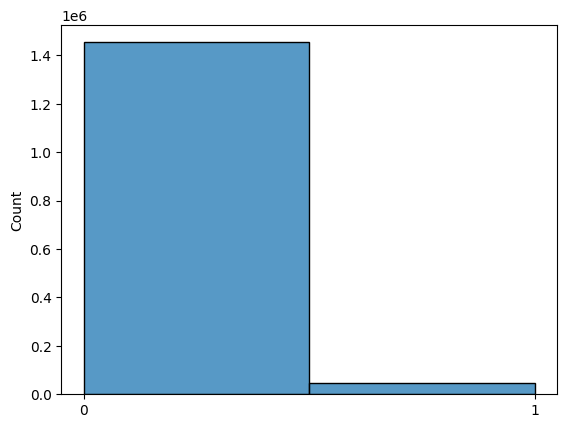

In [ ]:
sns.histplot(train_data["target"], bins=2, kde=False)
plt.xticks([0, 1])
plt.show()

Al observar que hay tan pocos datos 1 en el target (aprox 3%) vamos a utilizar la estrategia de detcción de anomalías.
El aprendizaje no supervisado, por medio de agrupamiento ha demostrado ser útil para este tipo de problemas.
Vamos a usar KMeans como una primera aproximación

In [ ]:
def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
seed = 10

In [ ]:
non_null_columns = [col_name for col_name in train_data.columns if train_data[col_name].null_count() == 0]
X = train_data.select(non_null_columns)
del train_data

In [ ]:
marital_state_mapping = {"a7fcb6e5": 0, "38c061ee": 1, "b6cabe76": 2, "3439d993": 3, "ecd83604": 4, "a55475b1": 5}
X = X.with_columns(
    pl.col("marital_state").apply(
        lambda x: marital_state_mapping[x],
        return_dtype=pl.UInt8,
    ).alias("marital_state_encoded")
)

<ipython-input-62-0f239ece441a>:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col("marital_state").apply(
<ipython-input-62-0f239ece441a>:3: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("marital_state").map_elements(lambda x: ...)
with this one instead:
  + pl.col("marital_state").replace(marital_state_mapping)

  pl.col("marital_state").apply(


In [ ]:
y = X.select('target')
X = X.drop(['target', 'case_id', 'marital_state'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(f'Error: {1 - classifier.score(X_test, y_test)}')

Error: 0.05795478780123697


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

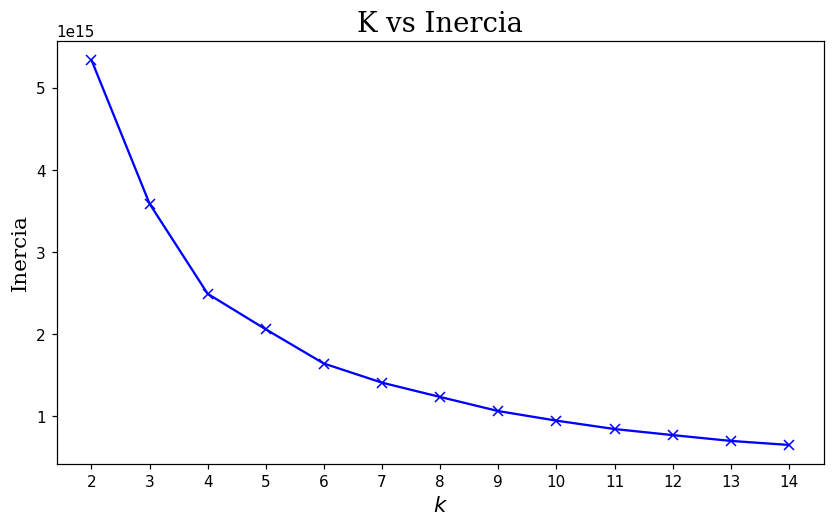

In [ ]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plot_metric(K, sum_of_squared_distances, 'Inercia')

In [ ]:
from sklearn import metrics


def tree_grid_search(X_train, y_train, param_grid, k,
# ¡No modifique los valores por defecto de los argumentos!
                seed = 333):


  """
  Entradas:
    X_train: Arreglo de NumPy con shape (n, m),
    y_train: Arreglo de NumPy con shape (n,).
    param_grid: Hiperparámetros a explorar.
    k: Número de pliegues de validación cruzada
    seed: semilla aleatoria para la creación de la partición.
  Retorna:
    gsearch: GridSearchCV entrenado con X_train y y_train.
  """

  tree_clf = DecisionTreeClassifier(random_state=seed)

  # Declare y entrene el objeto GridSearchCV.
  gsearch = GridSearchCV(tree_clf,
                   param_grid=param_grid,
                   cv=k
                   )
  gsearch.fit(X_train, y_train)

  ### FIN DEL CÓDIGO ###

  return gsearch

def tree_performance_metrics(gsearch, X_test, y_test):
  """
  Entradas:
    gsearch: Modelo entrenado con GridSearchCV
    X_digits_test: Arreglo de numpy con shape (n, m)
    y_digits_test: Arreglo de numpy con shape (n,)
  Retorna:
    accuracy: exactitud en prueba.
    precision_macro: precisión macro en prueba.
    recall_macro: recall macro en prueba.
    f1_macro: f1 score macro en prueba.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 6-7 líneas de código)
  y_predict = gsearch.predict(X_test)

  accuracy = metrics.accuracy_score(y_test, y_predict)
  precision_macro = metrics.precision_score(y_test, y_predict, average='macro')
  recall_macro = metrics.recall_score(y_test, y_predict, average='macro')
  f1_macro = metrics.f1_score(y_test, y_predict, average='macro')

  ### FIN DEL CÓDIGO ###

  return accuracy, precision_macro, recall_macro, f1_macro

In [ ]:
param_grid = {
    "max_depth": range(5, 60, 5),     # Profundidad máxima del árbol de decisión.
    "criterion": ["gini", "entropy"], # Criterio de partición del árbol.
  }

gsearch = tree_grid_search(X_train, y_train, param_grid, k=3)
acc, prec, rec, f1 = tree_performance_metrics(gsearch, X_test, y_test)

In [ ]:
from numbers import Number

print(f'Exactitud en prueba: {acc:.6f}' if isinstance(acc, Number) else 'La exactitud no es válida.')
print(f'Precisión macro en prueba: {prec:.6f}' if isinstance(prec, Number) else 'La precisión macro no es válida.')
print(f'Recall macro en prueba: {rec:.6f}' if isinstance(rec, Number) else 'El recall macro no es válido.')
print(f'F1 macro en prueba: {f1:.6f}' if isinstance(f1, Number) else 'El f1 macro no es válido.')

Exactitud en prueba: 0.969483
Precisión macro en prueba: 0.484745
Recall macro en prueba: 0.499997
F1 macro en prueba: 0.492253


In [ ]:
for idx, importance in enumerate(gsearch.best_estimator_.feature_importances_):
  print(f"la importancia de {X_test.columns[idx]} es: {importance}")


la importancia de amount es: 0.09985244837868987
la importancia de annuity es: 0.0
la importancia de current_debt es: 0.003922990581197104
la importancia de total_debt es: 0.0
la importancia de null_main_income es: 0.0004486272290463825
la importancia de null_instalments_paid es: 0.07809497496376726
la importancia de null_loans_started es: 0.04781418895024891
la importancia de null_last_approved_loan es: 0.0
la importancia de null_last_rejected_loan es: 0.4132146991867208
la importancia de null_max_annuity es: 0.0
la importancia de amount_annuity_ratio es: 0.29343970878625725
la importancia de high_annuity es: 0.0
la importancia de high_amount es: 0.0
la importancia de high_amount_annuity_ratio es: 0.0
la importancia de target_probability_annuity_ammount es: 0.0
la importancia de marital_state_encoded es: 0.06321236192407251


In [ ]:
y_train.shape

(1350424, 1)

### Modelo RandomForest y XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import class_weight


Random forest


In [ ]:
cat_1 = y_train['target'].sum()/y_train['target'].count()
cat_0 = 1 - cat_1
print(cat_0, cat_1)

0.9684269533124411 0.03157304668755887


In [ ]:
# Calcular los pesos de las clases
y_np = y['target']

weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_np)
class_weights = dict(enumerate(weights))

# Dividir datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred))

<ipython-input-84-bc03d137729d>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    145470
           1       0.04      0.02      0.03      4578

    accuracy                           0.95    150048
   macro avg       0.50      0.50      0.50    150048
weighted avg       0.94      0.95      0.95    150048



XGBoost


In [ ]:
import xgboost as xgb

# Crear el modelo XGBoost
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# De nuevo, inicializa el clasificador con el valor calculado
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight.rows()[0][0],
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# # Evaluar el modelo
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76    145470
           1       0.05      0.63      0.09      4578

    accuracy                           0.62    150048
   macro avg       0.52      0.63      0.42    150048
weighted avg       0.95      0.62      0.74    150048



Observamos que los 2 features que mayor información ofrence según el mejor árbol de decisión es:


*   null_last_rejected_loan
*   amount_annuity_ratio



## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*

* **Example notebook**
    - [Daniel Herman](https://www.kaggle.com/jetakow)